In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import os
import zipfile
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


**Loading Data**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-09 09:37:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   190MB/s    in 0.3s    

2020-06-09 09:37:16 (190 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**Access files and unzip data**

In [0]:

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Defining Directories**

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#Directory with our testing cat pictures
test_cats_dir = "/content/drive/My Drive/Cats and Dogs data/cats and dogs/dataset/TEST_SET/cats"

#Directory with our testing dog pictures
test_dogs_dir = "/content/drive/My Drive/Cats and Dogs data/cats and dogs/dataset/TEST_SET/dogs"


In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.866.jpg', 'cat.266.jpg', 'cat.598.jpg', 'cat.843.jpg', 'cat.444.jpg', 'cat.810.jpg', 'cat.603.jpg', 'cat.768.jpg', 'cat.726.jpg', 'cat.95.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total testing cat images: 1000
total testing dog images: 1000


In [0]:

#building a network
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compiling model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#data preprocessing
from keras.preprocessing.image import ImageDataGenerator
#rescaling pixel values btw o and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for train images
target_size=(150, 150),# All images will be resized to 150x150
batch_size=20,
class_mode='binary')#Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
validation_dir,   # This is the source directory for validation images
target_size=(150, 150), # All images will be resized to 150x150
batch_size=20,
class_mode='binary') #Since we use binary_crossentropy loss, we need binary labels


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
 for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('data batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
data batch shape: (20,)


In [0]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 149ms/step - loss: 0.6902 - acc: 0.5335 - val_loss: 0.6663 - val_acc: 0.4990
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6635 - acc: 0.5915 - val_loss: 0.5991 - val_acc: 0.5750
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6229 - acc: 0.6430 - val_loss: 0.4645 - val_acc: 0.6880
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5823 - acc: 0.7015 - val_loss: 0.5310 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5499 - acc: 0.7250 - val_loss: 0.6283 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5177 - acc: 0.7460 - val_loss: 0.5807 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4871 - acc: 0.7675 - val_loss: 0.4837 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 8s 77ms/step 

After training first time the accuracy has reached 98.6% but our validation accuracy is low at 75.6% which shows that our model is over fitting badly

**Displaying curves for validation and accuracy**

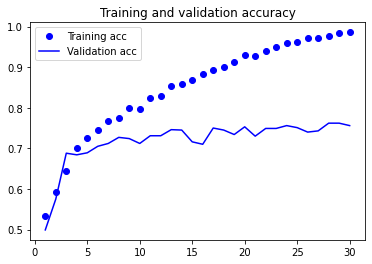

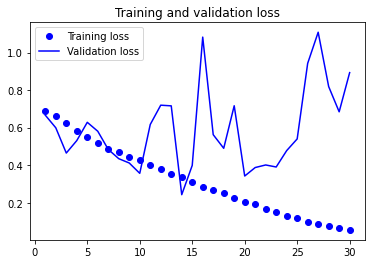

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Using Data Augmentation to improve accuracy**

In [0]:
#setting up data augmentation configuration via ImageData Generator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

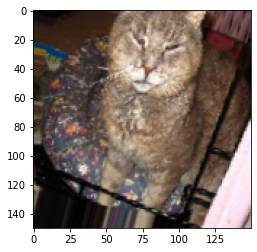

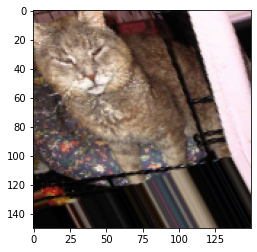

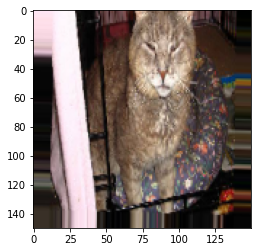

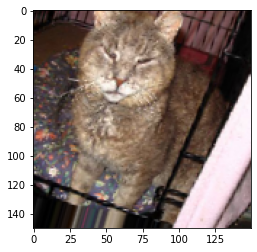

In [0]:
#visualizing some images from Augmentation
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

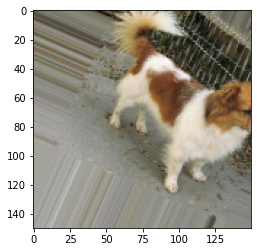

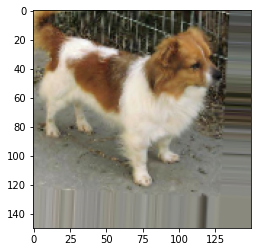

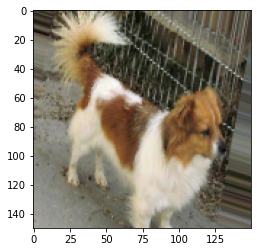

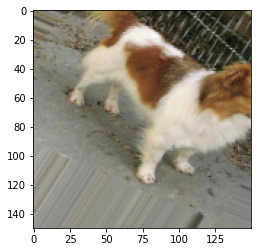

In [0]:
#visualizing some images from Augmentation
from keras.preprocessing import image
fnames = [os.path.join(train_dogs_dir, fname) for
fname in os.listdir(train_dogs_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [0]:
#defining new network with dropout to regularlize and reduce overfitting
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#data augmentation using Image Data Generator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
#rescaling the test images
test_datagen = ImageDataGenerator(rescale=1./255)
#setting up parameters to image reading for model training
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
#setting up parameters to image reading for model validation
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
#fitting the model using model.fit_generator
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6901 - acc: 0.5295 - val_loss: 0.6613 - val_acc: 0.5419
Epoch 2/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6762 - acc: 0.5638 - val_loss: 0.6696 - val_acc: 0.5612
Epoch 3/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6603 - acc: 0.5928 - val_loss: 0.6082 - val_acc: 0.5876
Epoch 4/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6511 - acc: 0.6102 - val_loss: 0.6172 - val_acc: 0.6617
Epoch 5/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6273 - acc: 0.6364 - val_loss: 0.6059 - val_acc: 0.7069
Epoch 6/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6154 - acc: 0.6486 - val_loss: 0.6509 - val_acc: 0.6701
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 0.6048 - acc: 0.6676 -

This time after data augmentation our accuracy and validation accuracy are about the same which shows that there has been considerable improvement in model and it is less prone to over fitting

In [0]:
#saving my model
model.save('cats_and_dogs_small_2.h5')

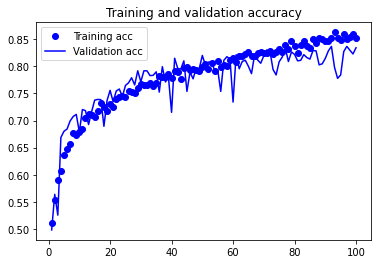

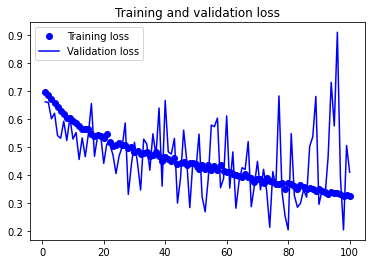

In [0]:
#visualizing the accuracy curves
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using a pretrained convent

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Now I have two options either to do fast feature extraction without data augmentation or extending the model and add dense layers on top to run the whole model end to end which will include data augmentation.First look at without data augmentation

****

1.   **Feature Extraction**




**Fast Feature Extraction without Data Augmentation**

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/tmp/cats_and_dogs_filtered' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
#flattening the images
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras import optimizers

#defining and training a densely connected classifier
#defining
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#compiling
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
#training
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 493us/step - loss: 0.6225 - acc: 0.6595 - val_loss: 0.4361 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 1s 369us/step - loss: 0.4411 - acc: 0.7950 - val_loss: 0.3599 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 1s 371us/step - loss: 0.3601 - acc: 0.8435 - val_loss: 0.3233 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 1s 356us/step - loss: 0.3152 - acc: 0.8715 - val_loss: 0.3054 - val_acc: 0.8720
Epoch 5/30
2000/2000 [==============================] - 1s 363us/step - loss: 0.2906 - acc: 0.8740 - val_loss: 0.2904 - val_acc: 0.8750
Epoch 6/30
2000/2000 [==============================] - 1s 366us/step - loss: 0.2669 - acc: 0.8950 - val_loss: 0.2811 - val_acc: 0.8800
Epoch 7/30
2000/2000 [==============================] - 1s 365us/step - loss: 0.2448 - acc: 0.9000 - val_loss: 0.2752 - val_acc: 0.8850


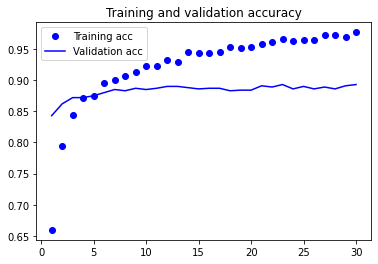

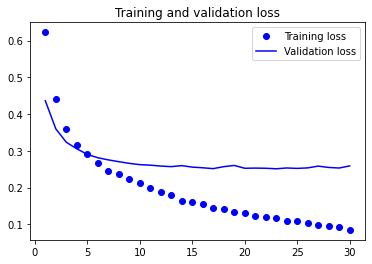

In [0]:
#visualizing results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model starts over fitting from the start and we can see it performed better than previous build model.Now,I will do same task with Data Augmentation which is computationally expensive but will provide better results

In [0]:
#Adding a densely connected classifier on top of the convolutional base
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)   #conv base 
model.add(layers.Flatten()) #adding the densely connected layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


Before compiling we need to freeze the layers so that the we prevent weight updates to change during training  

In [0]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 10


In [0]:
conv_base.trainable = False 

In [0]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights after freezing the conv base: 4


With this setup only weights from the two dense layers will be trained which is a total of four weight tensors(two per layer:one is weight matrix and other is bias vector)

**Training the model end to end with frozen covlutional base**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
#compiling model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
#fitting model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 34s 340ms/step - loss: 0.6054 - acc: 0.6735 - val_loss: 0.4508 - val_acc: 0.8210
Epoch 2/30
100/100 [==============================] - 26s 260ms/step - loss: 0.4719 - acc: 0.7965 - val_loss: 0.4983 - val_acc: 0.8100
Epoch 3/30
100/100 [==============================] - 26s 263ms/step - loss: 0.4237 - acc: 0.8085 - val_loss: 0.2297 - val_acc: 0.8400
Epoch 4/30
100/100 [==============================] - 26s 261ms/step - loss: 0.4004 - acc: 0.8255 - val_loss: 0.3199 - val_acc: 0.8620
Epoch 5/30
100/100 [==============================] - 26s 264ms/step - loss: 0.3879 - acc: 0.8345 - val_loss: 0.1393 - val_acc: 0.8640
Epoch 6/30
100/100 [==============================] - 27s 272ms/step - loss: 0.3812 - acc: 0.8315 - val_loss: 0.2508 - val_acc: 0.8750
Epoch 7/30
100/100 [==============================] - 26s 258ms/step - loss: 0.3732 - acc: 0.8335 - val_lo

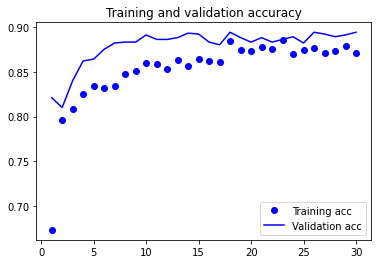

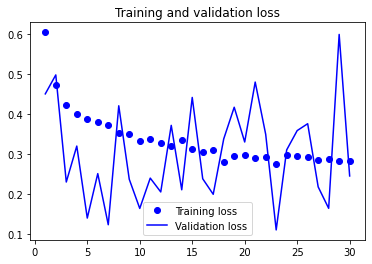

In [0]:
#visualizing results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



2.   **Fine tuning**: Unfreezing some of the top layers of a frozen model base used for feature extraction and jointly training both the newly added part of the model(fully connected classifier) and these top layers





In [0]:
# we will fine tune the last block of the VGG16 network 
#Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
#fine tuning the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 299ms/step - loss: 0.2907 - acc: 0.8715 - val_loss: 0.1172 - val_acc: 0.8970
Epoch 2/100
100/100 [==============================] - 27s 271ms/step - loss: 0.2612 - acc: 0.8925 - val_loss: 0.2459 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 28s 276ms/step - loss: 0.2506 - acc: 0.8950 - val_loss: 0.3457 - val_acc: 0.9140
Epoch 4/100
100/100 [==============================] - 27s 271ms/step - loss: 0.2292 - acc: 0.8995 - val_loss: 0.2043 - val_acc: 0.9190
Epoch 5/100
100/100 [==============================] - 27s 274ms/step - loss: 0.2033 - acc: 0.9175 - val_loss: 0.1978 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 27s 272ms/step - loss: 0.1988 - acc: 0.9170 - val_loss: 0.1503 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 28s 280ms/step - loss: 0.1742 - acc: 0.9310 - val_loss: 0.4506 - val_acc: 0.9280
Epoch 8/100
100/100 [===========================

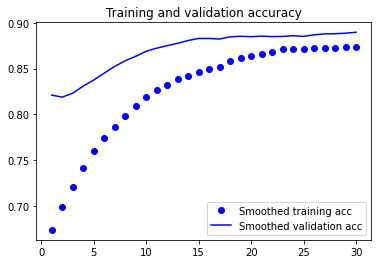

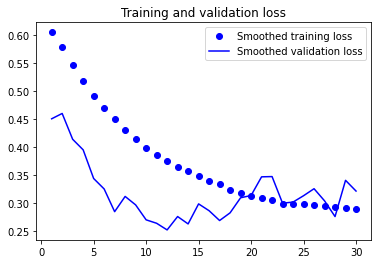

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#saving my model 
model.save('cats_and_dogs_final.h5')

Now evalauting on Test_set

In [0]:
test_generator = test_datagen.flow_from_directory("/content/drive/My Drive/Cats and Dogs data/cats and dogs/dataset/TEST_SET",
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.
test acc: 0.9490000009536743


**Visualizing what Convents learn**

In [0]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#processing a single image
img_path = '/content/drive/My Drive/Cats and Dogs data/cats and dogs/dataset/TEST_SET/cats/cat.102.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #np.expand_dims insert a new axis that will appear at the axis position in the expanded array shape.
img_tensor /= 255.
#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [0]:
img_tensor

array([[[[0.57254905, 0.5176471 , 0.46666667],
         [0.5686275 , 0.5137255 , 0.4627451 ],
         [0.53333336, 0.47843137, 0.42745098],
         ...,
         [0.4862745 , 0.43137255, 0.39607844],
         [0.44705883, 0.39215687, 0.35686275],
         [0.49411765, 0.4392157 , 0.40392157]],

        [[0.6039216 , 0.54901963, 0.49803922],
         [0.6       , 0.54509807, 0.49411765],
         [0.5568628 , 0.5019608 , 0.4509804 ],
         ...,
         [0.48235294, 0.42745098, 0.39215687],
         [0.43137255, 0.3764706 , 0.34117648],
         [0.46666667, 0.4117647 , 0.3764706 ]],

        [[0.5921569 , 0.5372549 , 0.4862745 ],
         [0.61960787, 0.5647059 , 0.5137255 ],
         [0.5647059 , 0.50980395, 0.45882353],
         ...,
         [0.47058824, 0.41568628, 0.38039216],
         [0.4392157 , 0.38431373, 0.34901962],
         [0.43137255, 0.3764706 , 0.34117648]],

        ...,

        [[0.12156863, 0.10588235, 0.09411765],
         [0.14117648, 0.1254902 , 0.11372549]

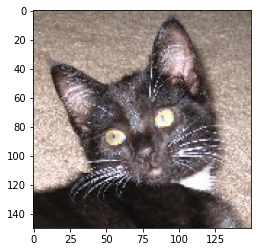

In [0]:
#visualizing image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [0]:
#using Keras Model class to which allows for models multiple outputs
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] #Extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #Creates a model that will return these outputs, given the model input
#the model has one input and eight outputs,one output per layer activation

In [0]:
#running the model in predict mode
activations = activation_model.predict(img_tensor) #Returns a list of fiveNumpy arrays: one array per layer activation

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


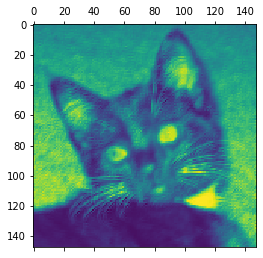

In [0]:
#lets plotting  the fourth channel of the activation of the first layer of the original model 
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

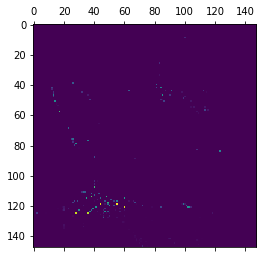

In [0]:
#lets plotting the fifth channel of the activation of the first layer of the original model 
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

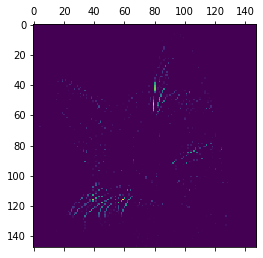

In [0]:
#lets plotting  the 32th channel of the activation of the first layer of the original model 
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


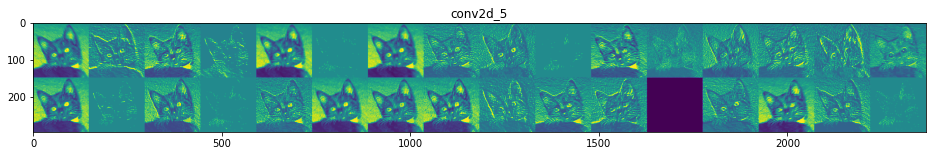

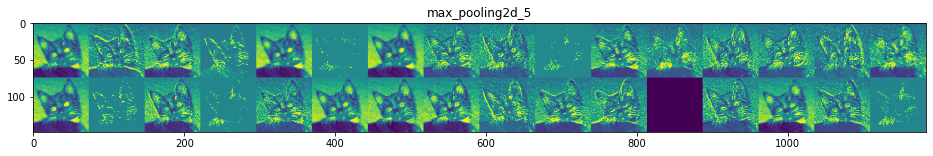

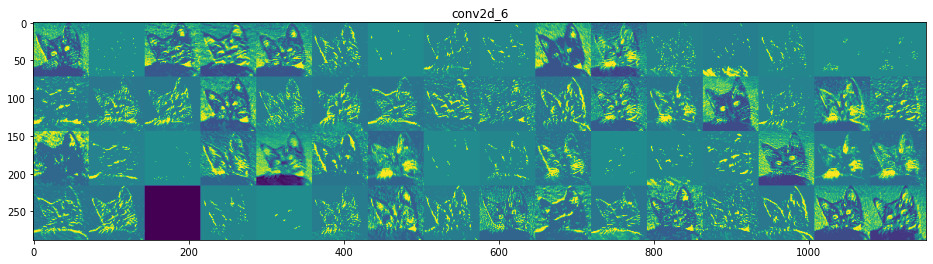

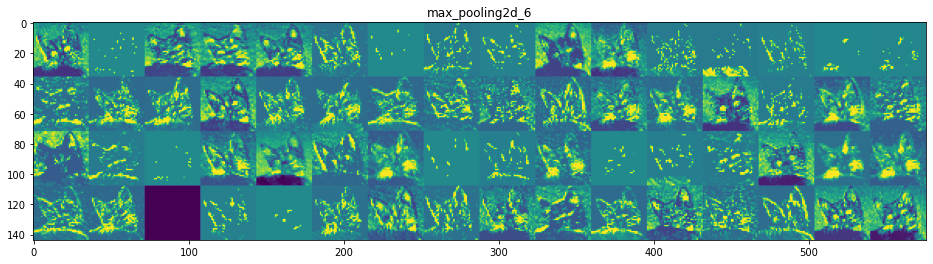

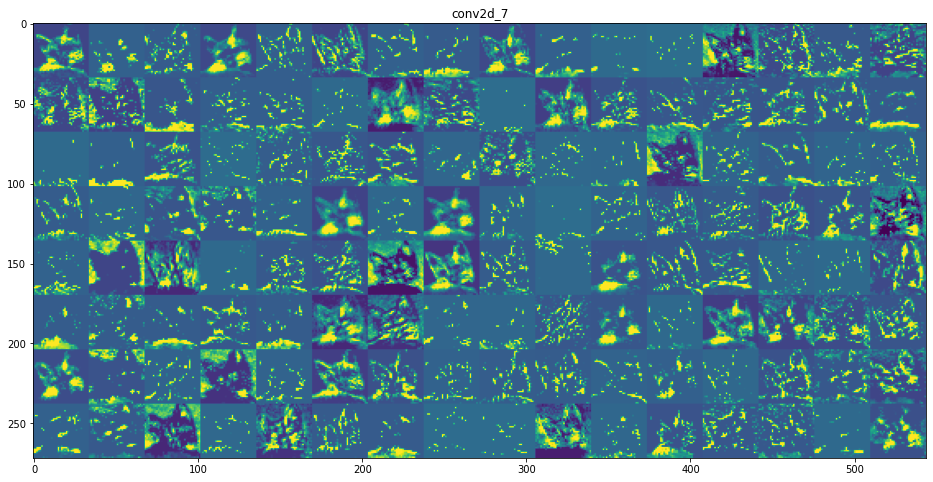

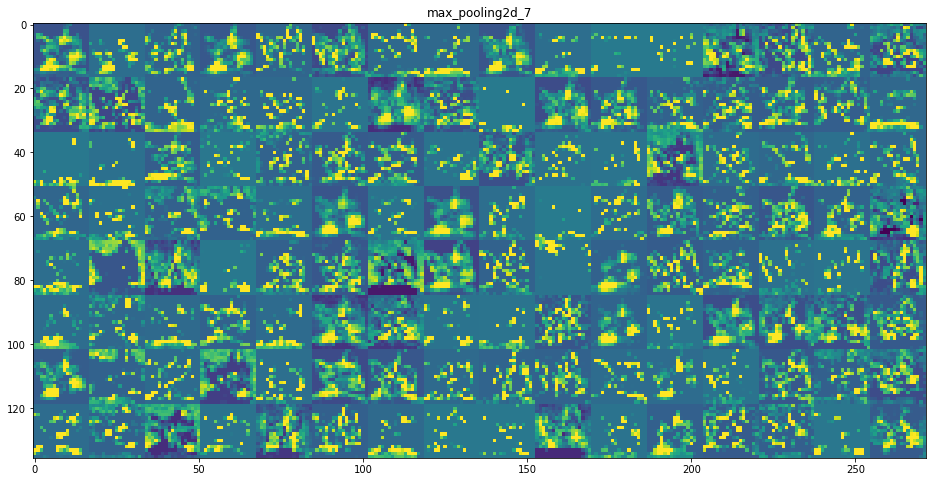

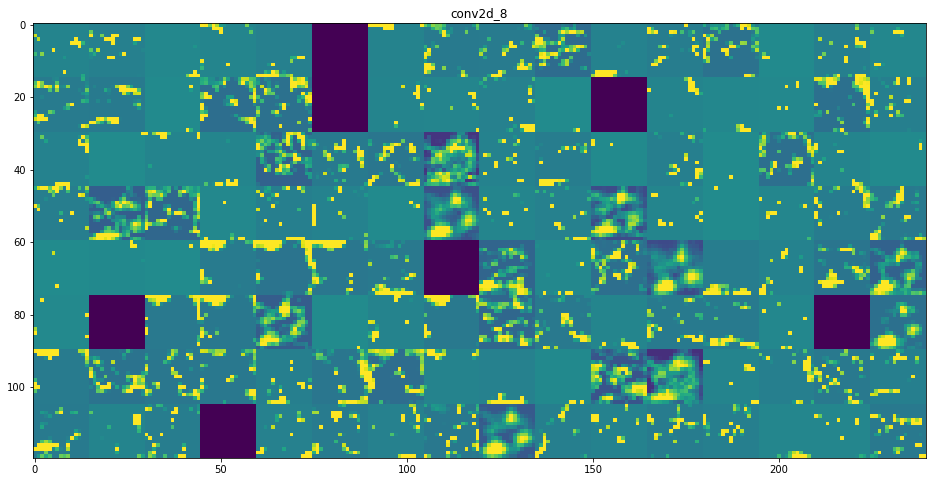

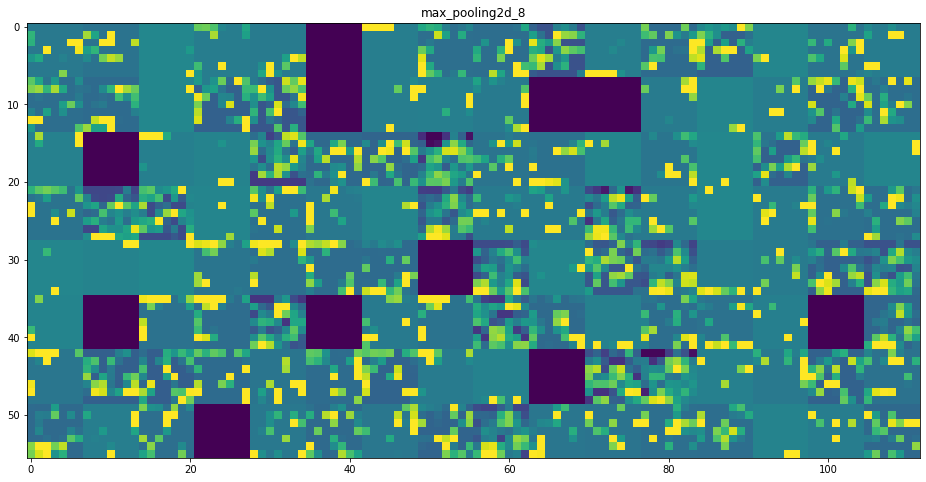

In [0]:
# Visualizing every channel in every intermediate activation
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)  #Names of the layers, so I can have them as part of my plot
  images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): #display the fature maps
  n_features = layer_activation.shape[-1]       #Number of features in the feature map
  size = layer_activation.shape[1]               #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row          #Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row): #Post-processes the feature to make it visually acceptable

      channel_image = layer_activation[0,:, :,col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image #displays the grid
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')